In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('customer_data.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(200, 29)

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,200.000000,200.000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.0,200.0,200.000000
mean,5633.330000,1968.260,53405.395000,0.460000,0.515000,46.860000,321.005000,25.705000,183.475000,38.570000,...,5.280000,0.060000,0.095000,0.060000,0.050000,0.0,0.005000,3.0,11.0,0.150000
std,3270.834831,12.064,22701.597661,0.556731,0.566906,27.962832,333.053054,40.265176,264.816803,56.708326,...,2.486466,0.238083,0.293951,0.238083,0.218492,0.0,0.070711,0.0,0.0,0.357967
min,0.000000,1943.000,2447.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.0,11.0,0.000000
25%,2681.500000,1958.000,35842.500000,0.000000,0.000000,24.000000,21.500000,1.000000,16.000000,2.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.0,11.0,0.000000
50%,6038.000000,1969.000,53857.500000,0.000000,0.000000,47.000000,222.000000,7.000000,68.000000,11.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.0,11.0,0.000000
75%,8450.250000,1977.000,69406.000000,1.000000,1.000000,69.000000,524.000000,29.250000,266.750000,46.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.0,11.0,0.000000
max,11178.000000,1992.000,157243.000000,2.000000,2.000000,99.000000,1349.000000,194.000000,1725.000000,254.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,3.0,11.0,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   200 non-null    int64 
 1   Year_Birth           200 non-null    int64 
 2   Education            200 non-null    object
 3   Marital_Status       200 non-null    object
 4   Income               200 non-null    int64 
 5   Kidhome              200 non-null    int64 
 6   Teenhome             200 non-null    int64 
 7   Dt_Customer          200 non-null    object
 8   Recency              200 non-null    int64 
 9   MntWines             200 non-null    int64 
 10  MntFruits            200 non-null    int64 
 11  MntMeatProducts      200 non-null    int64 
 12  MntFishProducts      200 non-null    int64 
 13  MntSweetProducts     200 non-null    int64 
 14  MntGoldProds         200 non-null    int64 
 15  NumDealsPurchases    200 non-null    int64 
 16  NumWebPu

In [7]:
# Select the numerical fields for clustering
numerical_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                  'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                  'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                  'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

In [8]:
# Normalize the data
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


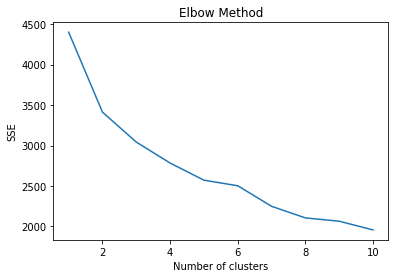

In [9]:
# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_cols])
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [10]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(df[numerical_cols])

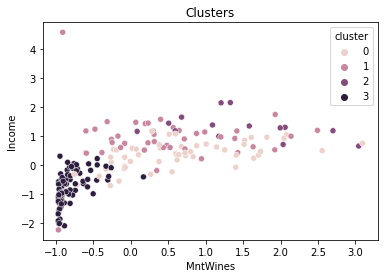

In [11]:
# Visualize the clusters
sns.scatterplot(x='MntWines', y='Income', hue='cluster', data=df)
plt.title('Clusters')
plt.show()


In [12]:
# Use the results
cluster_means = df.groupby('cluster')[numerical_cols].mean()

In [13]:
df.keys()

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'cluster'],
      dtype='object')

In [14]:
cluster_means

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.535310,0.341096,-0.468184,0.889821,-0.194445,0.604624,-0.109448,-0.150472,-0.206467,-0.128152,...,0.151012,-0.176086,0.110065,-0.252646,-0.062568,0.0,-0.070888,0.0,0.0,-0.165488
1,0.018930,0.923225,-0.784405,-0.608800,-0.092917,0.487027,1.195754,1.271665,1.298121,1.008496,...,-0.968434,0.158160,-0.240812,-0.252646,-0.005596,0.0,-0.070888,0.0,0.0,0.126367
2,0.002137,1.324697,-0.699703,-0.910720,0.240615,1.435568,0.427049,0.769668,0.597301,1.309768,...,-0.861667,-0.252646,1.624844,3.356577,1.737005,0.0,-0.070888,0.0,0.0,1.580316
3,0.318178,-0.835092,0.752295,-0.124770,0.123728,-0.814671,-0.544277,-0.607085,-0.558105,-0.584853,...,0.482928,0.074858,-0.210312,-0.252646,-0.229416,0.0,0.086641,0.0,0.0,-0.202263


In [1]:
df.corr()

NameError: name 'df' is not defined

In [ ]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [1]:
df.plot()

NameError: name 'df' is not defined